This notebook is a trial of the new machine learning class Model_Tester from ML_Class_1.py

Four models were tested to debug the class and to get a preliminary idea into what models should be explored further down the road. This will serve as a blue print for using the class Model_Tester in the future.


In [2]:
import numpy as np
import pandas as pd
from importlib import reload
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [60]:
import ML_Class_1
reload(ML_Class_1);
#ML Class
from ML_Class_1 import Model_Tester

In [6]:
#Complied data of convoys
#Routes examined are HX, SC, OB, ON, ONS
df = pd.read_csv('Complete_Convoy_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df.shape
df.head(3)

,Convoy Number,Number of Ships,Number of Escort Ships,Number of Stragglers,Number of Ships Sunk,Number of Escorts Sunk,Number of Stragglers Sunk,Total Tons of Convoy,Total Tons of Ships Sunk,Depart_Date,...,Overall Sink Percentage,Escort Sink Percentage,Straggler Sink Percentage,Avg Number of U-Boats in Atlantic,Escort Ratio,Time At Sea (Days),Month,Year,Previous Month Avg Sink %,Approx. Sighting Range
0,OB.1,5.0,2.0,0.0,0.0,0.0,0.0,22877.0,0.0,1939-09-07 00:00:00,...,0.0,0.0,0.0,6.0,0.400000,3.0,9.0,1939.0,0.0,12.190200
1,OB.2,5.0,2.0,0.0,0.0,0.0,0.0,22967.0,0.0,1939-09-09 00:00:00,...,0.0,0.0,0.0,6.0,0.400000,5.0,9.0,1939.0,0.0,12.190200
2,OB.3,7.0,4.0,0.0,0.0,0.0,0.0,21293.0,0.0,1939-09-11 00:00:00,...,0.0,0.0,0.0,6.0,0.571429,5.0,9.0,1939.0,0.0,14.434062


In [7]:
df = df.drop(columns=['Convoy Number', 'Number of Ships Sunk', 'Depart_Date', 'Arrival/Dispersal Date', 'Number of Escorts Sunk', \
                         'Number of Stragglers Sunk', 'Total Tons of Ships Sunk', 'Escort Sink Percentage', 'Straggler Sink Percentage'])
df.reset_index(drop=True).head(3)

,Number of Ships,Number of Escort Ships,Number of Stragglers,Total Tons of Convoy,Overall Sink Percentage,Avg Number of U-Boats in Atlantic,Escort Ratio,Time At Sea (Days),Month,Year,Previous Month Avg Sink %,Approx. Sighting Range
0,5.0,2.0,0.0,22877.0,0.0,6.0,0.400000,3.0,9.0,1939.0,0.0,12.190200
1,5.0,2.0,0.0,22967.0,0.0,6.0,0.400000,5.0,9.0,1939.0,0.0,12.190200
2,7.0,4.0,0.0,21293.0,0.0,6.0,0.571429,5.0,9.0,1939.0,0.0,14.434062


In [8]:
#Only instances where the convoy was together for more than 10 days
df_greater_than_10= df[df['Time At Sea (Days)'] > 10]
#Removes 298 convoys 

#Only instances where the convoy was together for more than 5 days
df_greater_than_5= df[df['Time At Sea (Days)'] > 5]
#Removes 184 convoys

In [9]:
df_greater_than_5['High Risk'] = (df_greater_than_5['Overall Sink Percentage'] > 0).astype(int)
X = np.array(df_greater_than_5.drop(columns=['Overall Sink Percentage', 'High Risk']))
y = df_greater_than_5['High Risk'].values

/var/folders/9n/my6phbv923z13rq9j99h3qz40000gn/T/ipykernel_21365/3370343599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_greater_than_5['High Risk'] = (df_greater_than_5['Overall Sink Percentage'] > 0).astype(int)


In [31]:
feature_names = df_greater_than_5.drop(columns=['Overall Sink Percentage', 'High Risk']).columns.tolist()

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1945),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1945),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1945),
    "Support Vector Machine": SVC(probability=True, random_state=1945)
        }


Preliminary Test of Four Models (seen above) with no Param optimization performed

DEBUG: Model initialized: RandomForestClassifier(random_state=1945)
Average Train Score: 1.0000 ± 0.0000
Average Test Score: 0.8240 ± 0.0222

RandomForestClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       149
           1       0.21      1.00      0.35        39

    accuracy                           0.23       188
   macro avg       0.61      0.51      0.20       188
weighted avg       0.84      0.23      0.11       188


ROC AUC Score: 0.6882
Matthews Correlation Coefficient (MCC): 0.0754
Balanced Accuracy: 0.5134

 RandomForestClassifier Plots: 




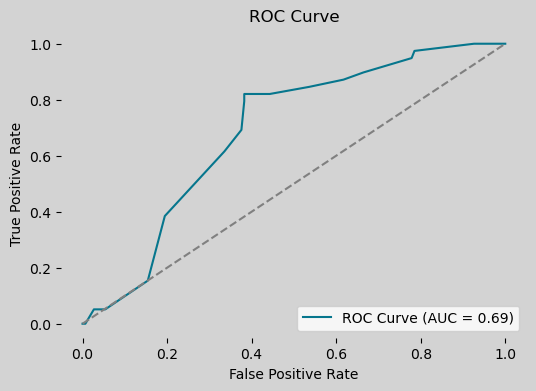

RandomForestClassifier Confusion Matrx:


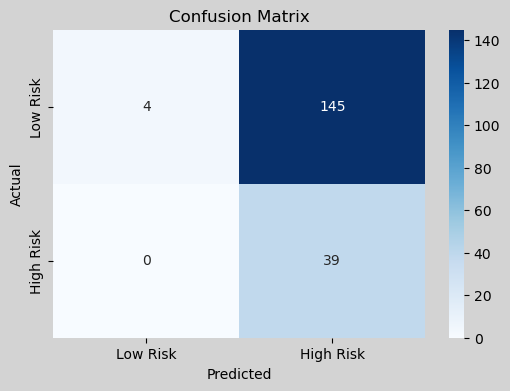

RandomForestClassifier Feature Importance Plot:


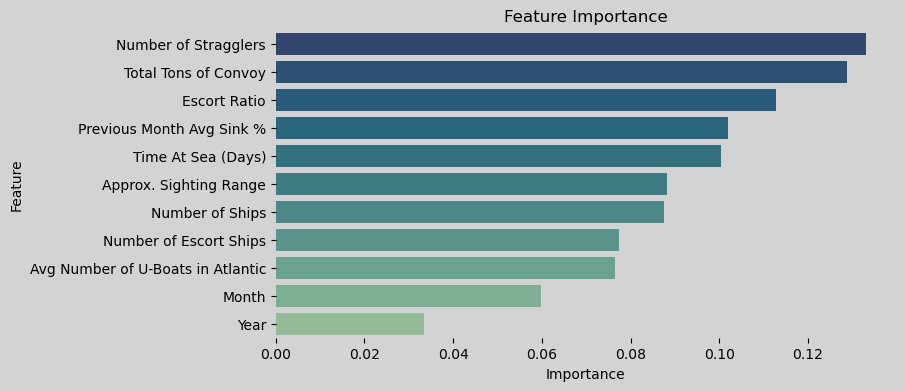

In [61]:
#Random Forest Classifier
tester = Model_Tester(model=RandomForestClassifier(n_estimators=100, random_state=1945), scaler=StandardScaler(), cv_folds=5, feature_names=feature_names)
tester.train_test_split(X, y)
tester.k_folds()
tester.optimize()
tester.evaluate()

Poor Results for RandomForestClassifier which alines with other tests performed. Unable to perform well with test data.

DEBUG: Model initialized: GradientBoostingClassifier(random_state=1945)
Average Train Score: 0.9513 ± 0.0045
Average Test Score: 0.8280 ± 0.0190

GradientBoostingClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       149
           1       0.54      0.36      0.43        39

    accuracy                           0.80       188
   macro avg       0.69      0.64      0.66       188
weighted avg       0.78      0.80      0.79       188


ROC AUC Score: 0.7575
Matthews Correlation Coefficient (MCC): 0.3270
Balanced Accuracy: 0.6392

 GradientBoostingClassifier Plots: 




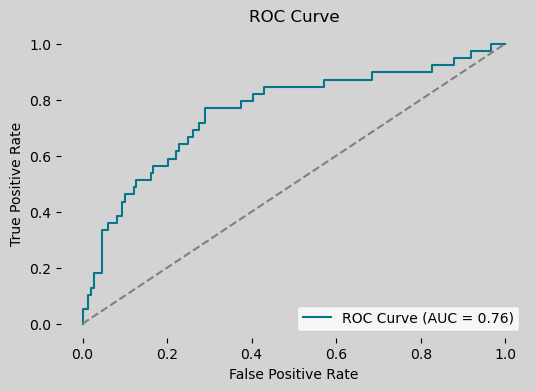

GradientBoostingClassifier Confusion Matrx:


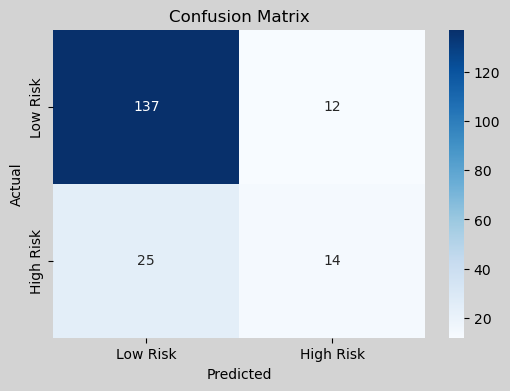

GradientBoostingClassifier Feature Importance Plot:


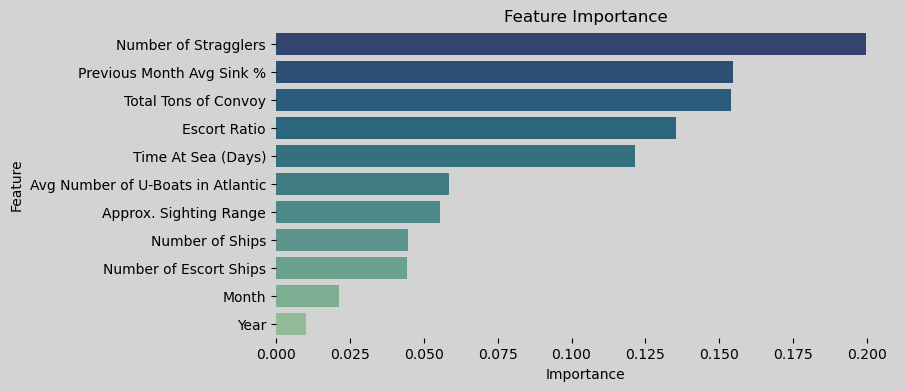

In [62]:
#Gradient Boosting Classifier                           
tester = Model_Tester(model=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1945), cv_folds=5, feature_names=feature_names)
tester.train_test_split(X, y)
tester.k_folds()
tester.optimize()
tester.evaluate()

As with other tests, Gradient Boosting appears to be the best classifier. Further refining, however, still needs to be done. Specifically, precision and recall need to be improved for the at risk class (1). 

DEBUG: Model initialized: LogisticRegression(max_iter=1000, random_state=1945)
Average Train Score: 0.8020 ± 0.0061
Average Test Score: 0.8000 ± 0.0126

LogisticRegression Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       149
           1       0.00      0.00      0.00        39

    accuracy                           0.79       188
   macro avg       0.40      0.50      0.44       188
weighted avg       0.63      0.79      0.70       188


ROC AUC Score: 0.5000
Matthews Correlation Coefficient (MCC): 0.0000
Balanced Accuracy: 0.5000

 LogisticRegression Plots: 




/Users/matthewplambeck/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewplambeck/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewplambeck/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


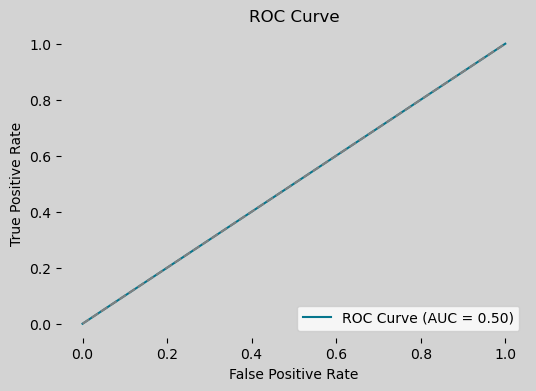

LogisticRegression Confusion Matrx:


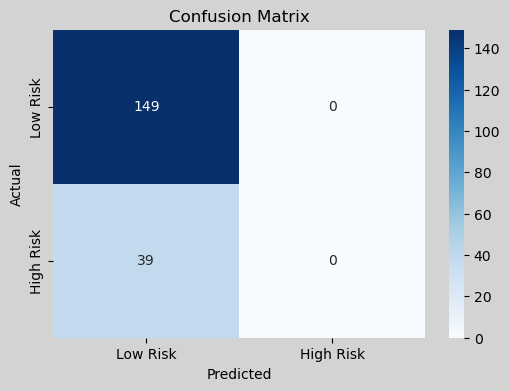

In [63]:
#Logistic Regression
tester = Model_Tester(model=LogisticRegression(max_iter=1000, random_state=1945), scaler=StandardScaler(), cv_folds=5, feature_names=feature_names)
tester.train_test_split(X, y)
tester.k_folds()
tester.optimize()
tester.evaluate()

As always, Logistic Regression sucks for this application...

DEBUG: Model initialized: SVC(probability=True, random_state=1945)
Average Train Score: 0.8357 ± 0.0052
Average Test Score: 0.8027 ± 0.0155

SVC Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       149
           1       0.00      0.00      0.00        39

    accuracy                           0.79       188
   macro avg       0.40      0.50      0.44       188
weighted avg       0.63      0.79      0.70       188


ROC AUC Score: 0.5000
Matthews Correlation Coefficient (MCC): 0.0000
Balanced Accuracy: 0.5000

 SVC Plots: 




/Users/matthewplambeck/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewplambeck/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewplambeck/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


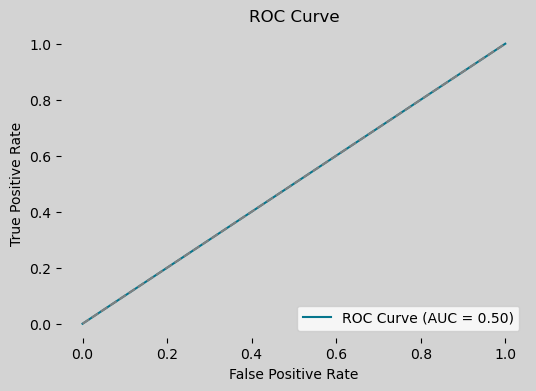

SVC Confusion Matrx:


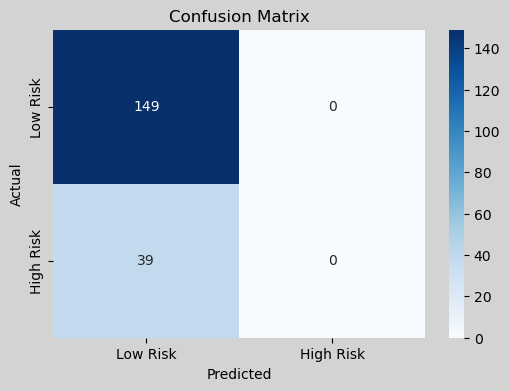

In [64]:
#Supoport Vector Machine
tester = Model_Tester(model=SVC(probability=True, random_state=1945), scaler=StandardScaler(), cv_folds=5, feature_names=feature_names)
tester.train_test_split(X, y)
tester.k_folds()
tester.optimize()
tester.evaluate()

Support Vector Machine also sucks for this application. Unable to predict high risk convoys from some reason...

Note:

This notebook is finalized 